In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sb

# Reading the main dataset
countryData = pd.read_csv('Countries_of_the_World/countries_of_the_world.csv') 
countryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [2]:
countryData.head(10)

countryData['Literacy (%)'].head(10)

0     36,0
1     86,5
2     70,0
3     97,0
4    100,0
5     42,0
6     95,0
7     89,0
8     97,1
9     98,6
Name: Literacy (%), dtype: object

In [3]:
countryData.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [4]:
#gdpChart.drop_duplicates(subset="First Name",keep=False, inplace=True)
gdpChart = countryData
gdpChart['GDP ($ per capita)'] = gdpChart['GDP ($ per capita)'].replace(np.nan,0)
gdpChart = gdpChart.sort_values(by=['GDP ($ per capita)'])

gdpChart.head(10)
#gdpChart.tail(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,0.0,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007,"70,8","4,70",0,"47,41",500.0,"58,6",NaN,"4,71","0,67","94,62",2,"26,99","6,24","0,085","0,231","0,684"
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,"13,9","0,47","5,37","116,7",500.0,"37,8","11,3","1,67","0,04","98,29",1,"45,13","16,63","0,65","0,1","0,25"
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,"83,7","0,56",0,"143,64",500.0,"31,4","4,0","6,98","0,89","92,13",2,"45,76","23,03","0,49","0,31","0,21"
125,Malawi,SUB-SAHARAN AFRICA,13013926,118480,"109,8","0,00",0,"103,32",600.0,"62,7","7,9","23,38","1,49","75,13",2,"43,13","19,33","0,342","0,158","0,499"
200,Tanzania,SUB-SAHARAN AFRICA,37445392,945087,"39,6","0,15","-2,06","98,54",600.0,"78,2","4,0","4,52","1,08","94,4",NaN,"37,71","16,39","0,432","0,172","0,396"
74,Gaza Strip,NEAR EAST,1428757,360,"3968,8","11,11","1,6","22,93",600.0,NaN,"244,3","28,95","21,05",50,3,"39,45","3,8","0,03","0,283","0,687"
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,"290,7","0,00","-0,06","69,29",600.0,"51,6","3,4","35,05","14,02","50,93",2,"42,22","13,46","0,463","0,203","0,334"
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,3702314,342000,"10,8","0,05","-0,17","93,86",700.0,"83,8","3,7","0,51","0,13","99,36",2,"42,57","12,93","0,062","0,57","0,369"
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410,"26,7","0,00",0,"94,69",700.0,"65,5","0,2","2,96","0,52","96,52",2,"43,69","13,27","0,55","0,11","0,34"


In [5]:
# Function is used to show values of the countries rather than percentages
# Used only in pie charts
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

Text(0.5, 1.0, 'Last 10 GDP ($ per capita) Countries')

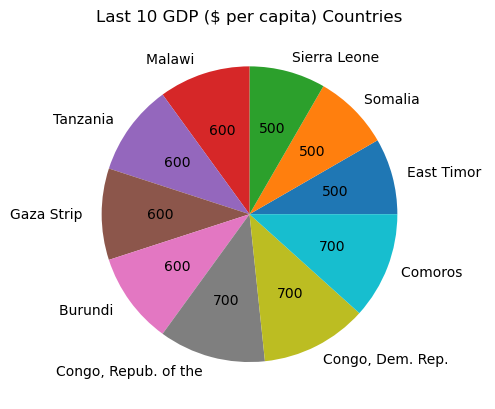

In [6]:
# Removing the first row as it does not have a value
last10gdp = gdpChart.iloc[1: , :].head(10)
#last10gdp.groupby('GDP ($ per capita)').size().plot(kind='pie', autopct='%1.0f%%', cmap='GnBu', labels = last10gdp['Country'])

figure, axisPie = plot.subplots()
# Configuring plot
axisPie.pie(last10gdp['GDP ($ per capita)'], labels=last10gdp['Country'], autopct=autopct_format(last10gdp['GDP ($ per capita)']))
plot.ylabel("", horizontalalignment='left')
plot.title("Last 10 GDP ($ per capita) Countries")

In [7]:
import matplotlib.colors as mcolors

# Colorlist to be used in bar charts
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]

# A function that maps the colors to values
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

# Used in the first 2 bar charts
x = np.arange(10).astype(float)
y = np.random.uniform(0, 5, size=(10,))

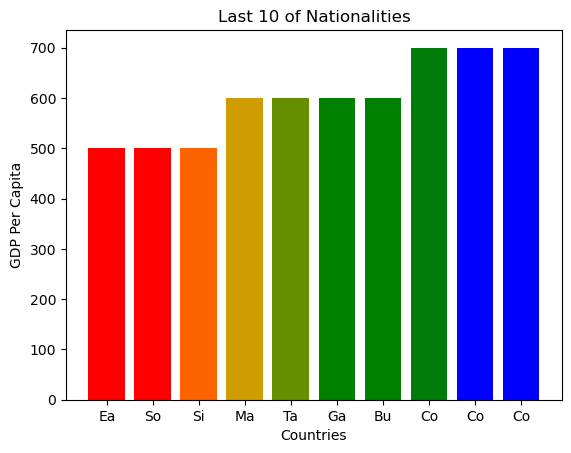

In [8]:
# Getting the position
x_pos = np.arange(len(last10gdp))

plot.bar(x_pos, last10gdp['GDP ($ per capita)'], color=rvb(x/10))
last10gdp['ShortName'] = last10gdp['Country'].astype(str).str[0] + last10gdp['Country'].astype(str).str[1]

plot.xticks(x_pos, last10gdp['ShortName'])
plot.xlabel('Countries')
plot.ylabel('GDP Per Capita')
plot.title("Last 10 of Nationalities")
plot.show()

Text(0.5, 1.0, 'Top 10 GDP ($ per capita) Countries')

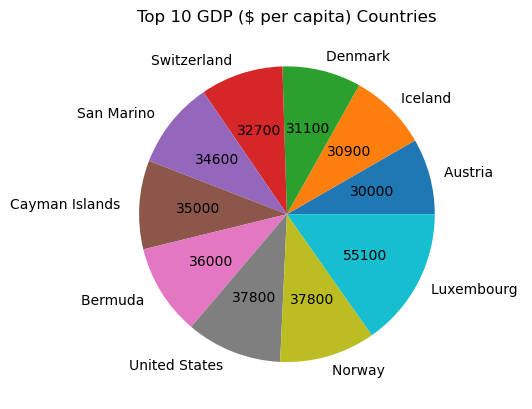

In [9]:
# Grouping by embarked to only show ports in the plot
top10gdp = gdpChart.tail(10)

figure1, axisPie1 = plot.subplots()
# Configuring plot
axisPie1.pie(top10gdp['GDP ($ per capita)'], labels=top10gdp['Country'], autopct=autopct_format(top10gdp['GDP ($ per capita)']))
plot.ylabel("", horizontalalignment='left')
plot.title("Last 10 GDP ($ per capita) Countries")

C:\Users\Melih\AppData\Local\Temp\ipykernel_14860\1936322009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10gdp['ShortName'] = top10gdp['Country'].astype(str).str[0] + top10gdp['Country'].astype(str).str[1]


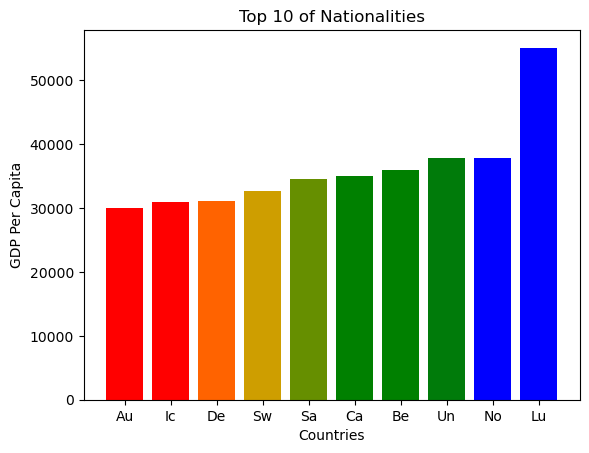

In [10]:

x_pos = np.arange(len(last10gdp))

plot.bar(x_pos, top10gdp['GDP ($ per capita)'], color=rvb(x/10))
top10gdp['ShortName'] = top10gdp['Country'].astype(str).str[0] + top10gdp['Country'].astype(str).str[1]

plot.xticks(x_pos, top10gdp['ShortName'])
plot.xlabel('Countries')
plot.ylabel('GDP Per Capita')
plot.title("Top 10 of Nationalities")
plot.show()

In [11]:
print(countryData.shape)
print(countryData.columns)
print(countryData.isnull().sum())

(227, 20)
Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     0
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate

In [12]:
countryData=pd.get_dummies(countryData)
countryData.head(5)
#print('\ncurrent shape: ', countryData.shape)

,Population,Area (sq. mi.),GDP ($ per capita),Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,...,"Service_0,84","Service_0,86","Service_0,87","Service_0,89","Service_0,9","Service_0,906","Service_0,92","Service_0,927","Service_0,93","Service_0,954"
0,31056997,647500,700.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,4500.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32930091,2381740,6000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57794,199,8000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71201,468,19000.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
inflationDataEU = pd.read_csv('EU_InflationRate/EU_Inflation.csv')
inflationDataEU.head(15)
inflationDataEU.tail(15)

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
26,Poland,4.2,4.0,2.6,3.9,3.7,0.8,0.1,-0.7,-0.2,1.6,1.2,2.1
27,Portugal,2.7,-0.9,1.4,3.6,2.8,0.4,-0.2,0.5,0.6,1.6,1.2,0.3
28,Romania,7.9,5.6,6.1,5.8,3.4,3.2,1.4,-0.4,-1.1,1.1,4.1,3.9
29,Slovenia,5.5,0.8,2.1,2.1,2.8,1.9,0.4,-0.8,-0.2,1.6,1.9,1.7
30,Slovakia,3.9,0.9,0.7,4.1,3.7,1.5,-0.1,-0.3,-0.5,1.4,2.5,2.8
31,Finland,3.9,1.6,1.7,3.3,3.2,2.2,1.2,-0.2,0.4,0.8,1.2,1.1
32,Sweden,3.3,1.9,1.9,1.4,0.9,0.4,0.2,0.7,1.1,1.9,2.0,1.7
33,United Kingdom,3.6,2.2,3.3,4.5,2.8,2.6,1.5,0.0,0.7,2.7,2.5,1.8
34,Iceland,12.8,16.3,7.5,4.2,6.0,4.1,1.0,0.3,0.8,-1.7,0.7,2.0
35,Norway,3.4,2.3,2.3,1.3,0.4,2.0,1.9,2.0,3.9,1.9,3.0,2.3


In [14]:
inflationDataEU

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,European Union (changing composition),3.7,1.0,2.1,3.1,2.6,1.5,0.6,0.1,0.2,1.7,1.9,1.5
1,EU (27 countries - from 2020),3.7,0.8,1.8,2.9,2.6,1.3,0.4,0.1,0.2,1.6,1.8,1.4
2,EU (28 countries),3.7,1.0,2.1,3.1,2.6,1.5,0.6,0.1,0.2,1.7,1.9,1.5
3,Euro area (changing composition),3.3,0.3,1.6,2.7,2.5,1.4,0.4,0.2,0.2,1.5,1.8,1.2
4,Euro area - 19 countries (from 2015),3.3,0.3,1.6,2.7,2.5,1.3,0.4,0.2,0.2,1.5,1.8,1.2
5,Euro area - 18 countries (2014),3.3,0.3,1.6,2.7,2.5,1.4,0.4,0.2,0.2,1.5,1.8,1.2
6,Belgium,4.5,0.0,2.3,3.4,2.6,1.2,0.5,0.6,1.8,2.2,2.3,1.2
7,Bulgaria,12.0,2.5,3.0,3.4,2.4,0.4,-1.6,-1.1,-1.3,1.2,2.6,2.5
8,Czechia,6.3,0.6,1.2,2.2,3.5,1.4,0.4,0.3,0.6,2.4,2.0,2.6
9,Denmark,3.6,1.0,2.2,2.7,2.4,0.5,0.4,0.2,0.0,1.1,0.7,0.7


In [15]:
# inflationDataEU = inflationDataEU.drop(5)
inflationDataEU.drop(index=inflationDataEU.index[:5], axis=0, inplace=True)
inflationDataEU.head(5)

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Euro area - 18 countries (2014),3.3,0.3,1.6,2.7,2.5,1.4,0.4,0.2,0.2,1.5,1.8,1.2
6,Belgium,4.5,0.0,2.3,3.4,2.6,1.2,0.5,0.6,1.8,2.2,2.3,1.2
7,Bulgaria,12.0,2.5,3.0,3.4,2.4,0.4,-1.6,-1.1,-1.3,1.2,2.6,2.5
8,Czechia,6.3,0.6,1.2,2.2,3.5,1.4,0.4,0.3,0.6,2.4,2.0,2.6
9,Denmark,3.6,1.0,2.2,2.7,2.4,0.5,0.4,0.2,0.0,1.1,0.7,0.7


In [16]:

gdpChart['Country']

223    Western Sahara 
58         East Timor 
188           Somalia 
183      Sierra Leone 
125            Malawi 
            ...       
38     Cayman Islands 
22            Bermuda 
214     United States 
154            Norway 
121        Luxembourg 
Name: Country, Length: 227, dtype: object

In [17]:
inflationDataEU['geo']

5     Euro area - 18 countries (2014)
6                             Belgium
7                            Bulgaria
8                             Czechia
9                             Denmark
10                            Germany
11                            Estonia
12                            Ireland
13                             Greece
14                              Spain
15                             France
16                            Croatia
17                              Italy
18                             Cyprus
19                             Latvia
20                          Lithuania
21                         Luxembourg
22                            Hungary
23                              Malta
24                        Netherlands
25                            Austria
26                             Poland
27                           Portugal
28                            Romania
29                           Slovenia
30                           Slovakia
31          

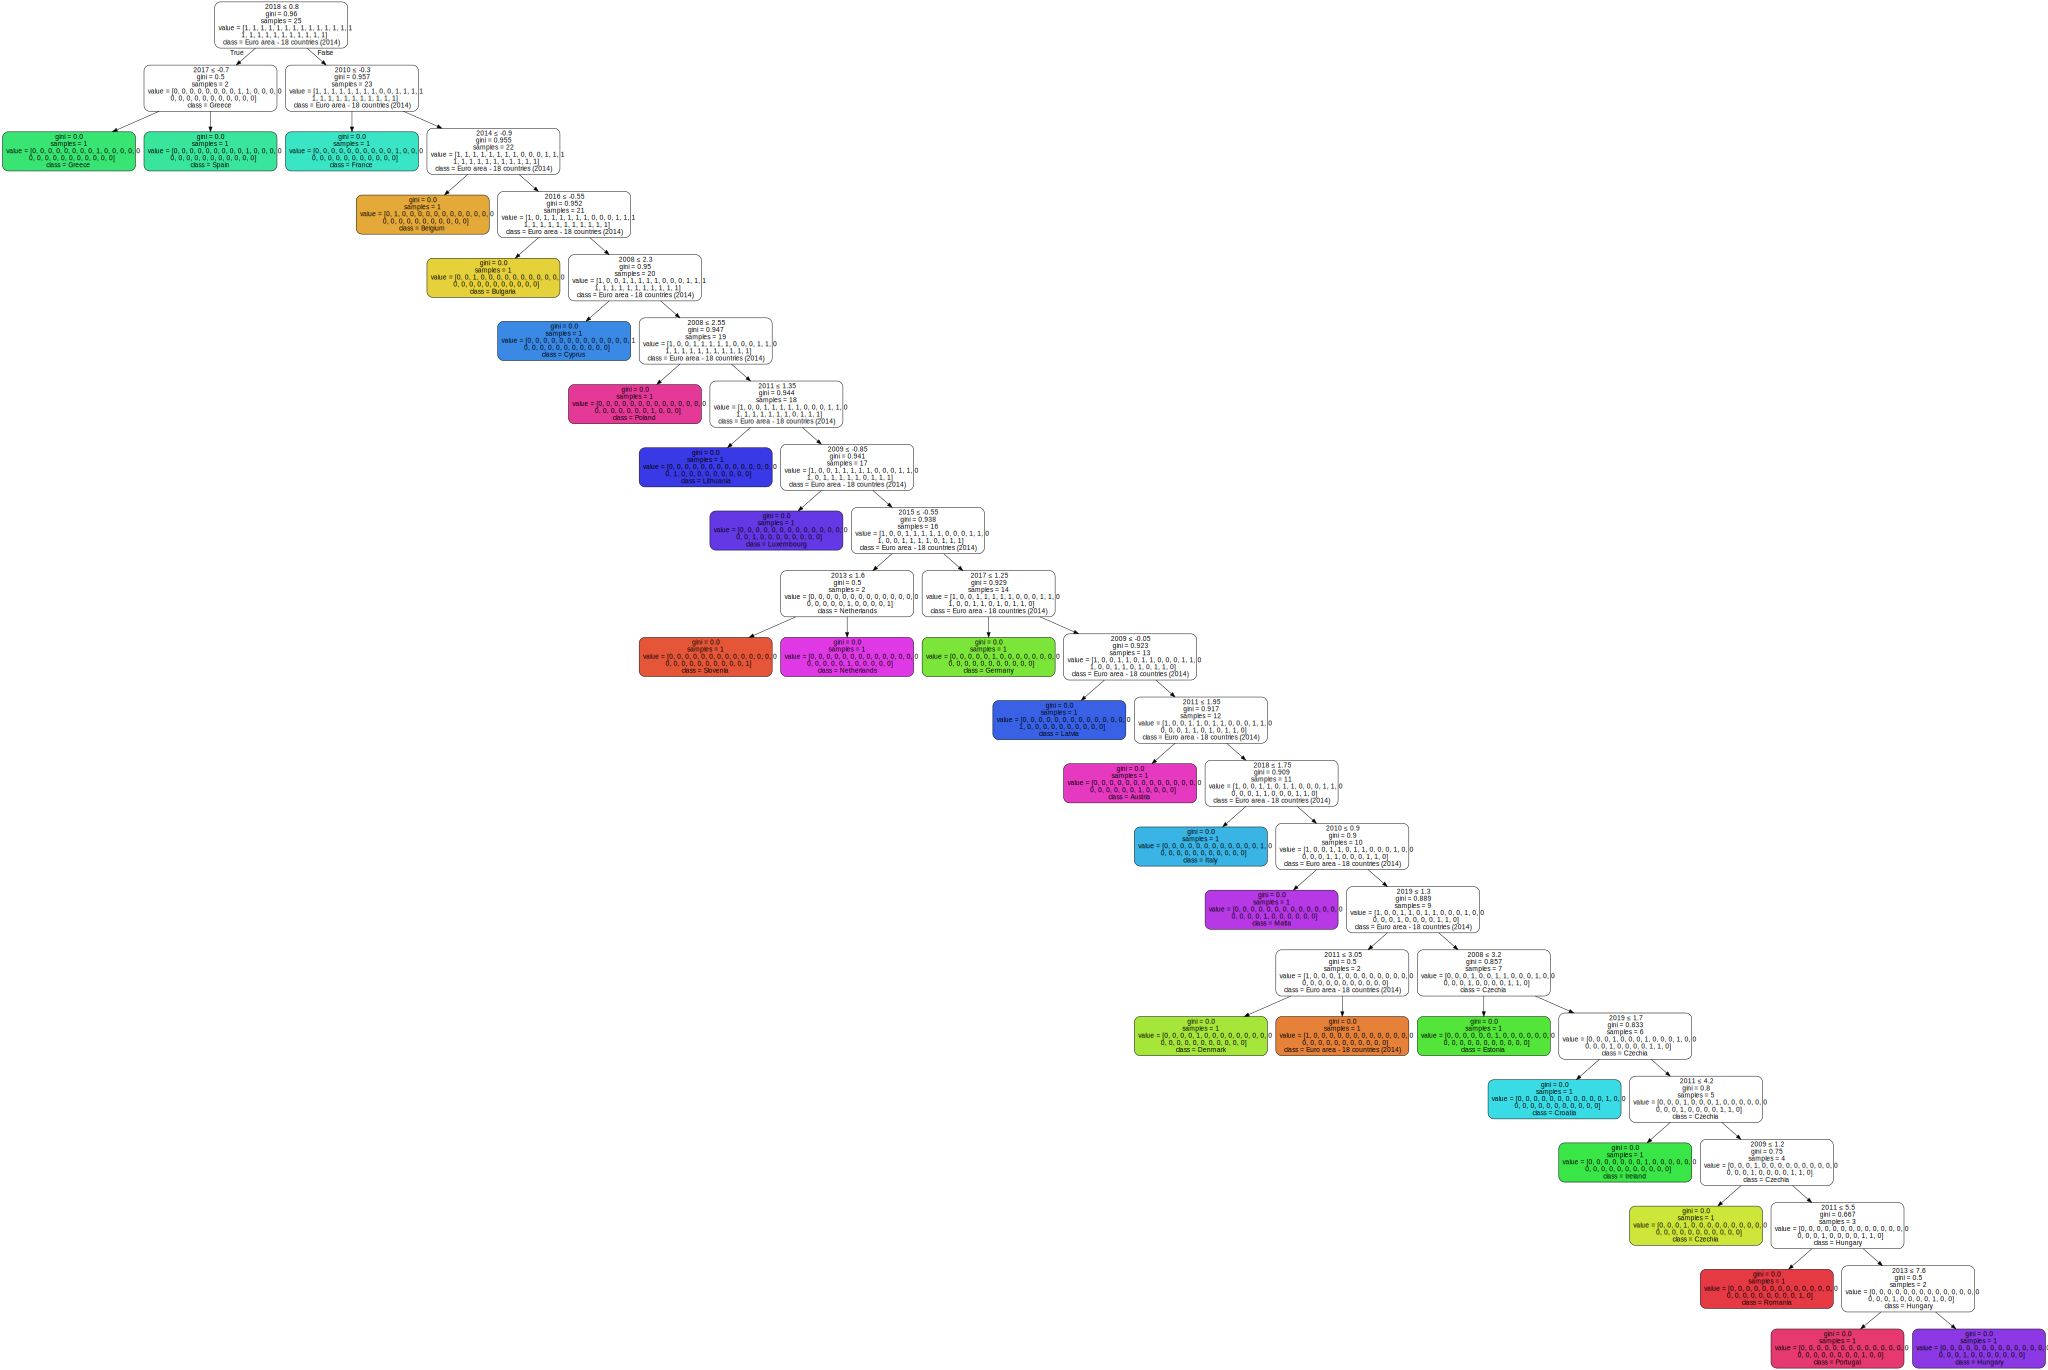

In [496]:
import graphviz
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, export_graphviz


X = inflationDataEU.drop(columns=['geo'])
y = inflationDataEU['geo']
# Splitting the dataset to %70 training and %30 testing sets
train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y, test_size = 0.3,shuffle = 1)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_X,train_y)

dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
        '2017', '2018','2019'], class_names = inflationDataEU.geo.values,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [497]:
from sklearn.metrics import confusion_matrix

pred = decision_tree_model.predict(test_X)
pred

array(['United States', 'United States', 'Malta', 'France', 'Ireland',
       'Bulgaria', 'Croatia', 'Croatia', 'Luxembourg', 'United States',
       'Hungary'], dtype=object)

In [498]:
import sklearn as sl

# Using model_selection for splitting the dataset
# linear model for LinearRegression function
from sklearn import model_selection, datasets, linear_model

linearData = inflationDataEU.drop(columns=['geo'])

linearData.fillna(0)

# Creating x and y variables that holds the target values and x axis values

X = linearData[['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
        '2017', '2018']]
y = linearData['2019']
# Splitting the dataset to %70 training and %30 testing sets
train_X, test_X, train_y, test_y = model_selection.train_test_split(X,y, test_size = 0.3,shuffle = 1)


In [499]:
# Creating a linear regression model
model = linear_model.LinearRegression()

# Training the model
model.fit(train_X,train_y)

# Predict the values according to the test_x
pred = model.predict(test_X)

print(pred)
# Print the absolute end squared errors
print('Mean Absolute Error:', sl.metrics.mean_absolute_error(test_y, pred))
print('Mean Squared Error:', sl.metrics.mean_squared_error(test_y, pred))

# Chosing a random country
randomCountry = test_X.sample()

# Create a prediction for the random country
prediction = model.predict(randomCountry)

# Locate the actual length
actualLength = test_y.loc[randomCountry.index]

# Printing the values, difference and mean squared error
print("Randomly Chosen Country's Inflation = ", actualLength.values[0])
print("Predicted Inflation =   ", prediction[0])
print("Difference = ", abs(actualLength.values[0] - prediction[0]))
print("Mean squared error = ", sl.metrics.mean_squared_error(actualLength,prediction))


[0.56229357 0.5616462  1.75397418 0.44361962 3.36750265 1.28037866
 0.34901279 2.56229894 0.09520268 2.48652014 2.53993116]
Mean Absolute Error: 0.49506561588220604
Mean Squared Error: 0.3554457334876285
Randomly Chosen Country's Inflation =  2.5
Predicted Inflation =    1.7539741773377027
Difference =  0.7460258226622973
Mean squared error =  0.5565545280789576


Text(0.5, 1.0, 'Linear Regression Heatmap')

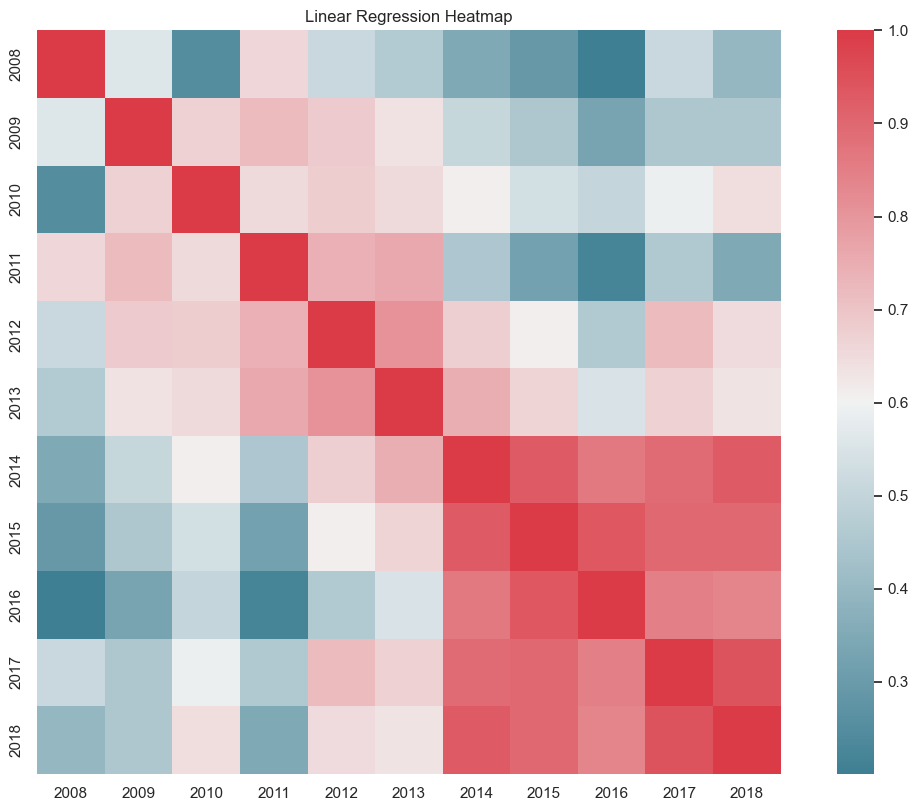

In [500]:


import seaborn as sns
corr = train_X.corr()

# Setting the size of the heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Plotting
heatmap = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True);

heatmap.axes.set_title("Linear Regression Heatmap", fontsize = 12)

In [501]:
import plotly.express as px
inflationDataEU_Converted = pd.melt(frame=inflationDataEU, id_vars='geo', value_vars=inflationDataEU.columns.tolist()[1:], var_name='years', value_name='inflation_rate')

fig = px.line(inflationDataEU_Converted, x="years", y="inflation_rate", color="geo")

fig.update_layout(title = "Inflation Rates Comparison", yaxis_title = "Inflation Rate", xaxis_title= "Years")
fig.show()


In [502]:
from  pandas import json_normalize

df_geo = json_normalize(pd.read_json('EU_InflationRate/json')['records'])[['countriesAndTerritories', 'countryterritoryCode']].drop_duplicates().reset_index(drop=True)

df_geo

# Configuring the dataset to be used in choropleth graphs

inflationDataEU_Converted.loc[inflationDataEU_Converted.geo == 'United Kingdom','geo']='United_Kingdom'
inflationDataEU_Converted.loc[inflationDataEU_Converted.geo ==  'United States','geo']='United_States'
inflationDataEU_Converted.loc[inflationDataEU_Converted.geo ==  'North Macedonia','geo']='North_Macedonia'

In [503]:
filter1 = (inflationDataEU_Converted.geo != 'European Union (changing composition)')&(inflationDataEU_Converted.geo != 'EU (27 countries - from 2020)')\
            &(inflationDataEU_Converted.geo != 'EU (28 countries)')&(inflationDataEU_Converted.geo != 'Euro area (changing composition)')\
            &(inflationDataEU_Converted.geo != 'EU (28 countries)')&(inflationDataEU_Converted.geo != 'Euro area (changing composition)')\
            &(inflationDataEU_Converted.geo != 'Euro area - 19 countries  (from 2015)')&(inflationDataEU_Converted.geo != 'Euro area - 18 countries (2014)')
df_geo = pd.merge(inflationDataEU_Converted[filter1].reset_index(drop=True), df_geo, left_on='geo', right_on='countriesAndTerritories').drop(columns=['countriesAndTerritories'])
df_geo

,geo,years,inflation_rate,countryterritoryCode
0,Belgium,2008,4.5,BEL
1,Belgium,2009,0.0,BEL
2,Belgium,2010,2.3,BEL
3,Belgium,2011,3.4,BEL
4,Belgium,2012,2.6,BEL
...,...,...,...,...
403,Turkey,2015,7.7,TUR
404,Turkey,2016,7.7,TUR
405,Turkey,2017,11.1,TUR
406,Turkey,2018,16.3,TUR


[]

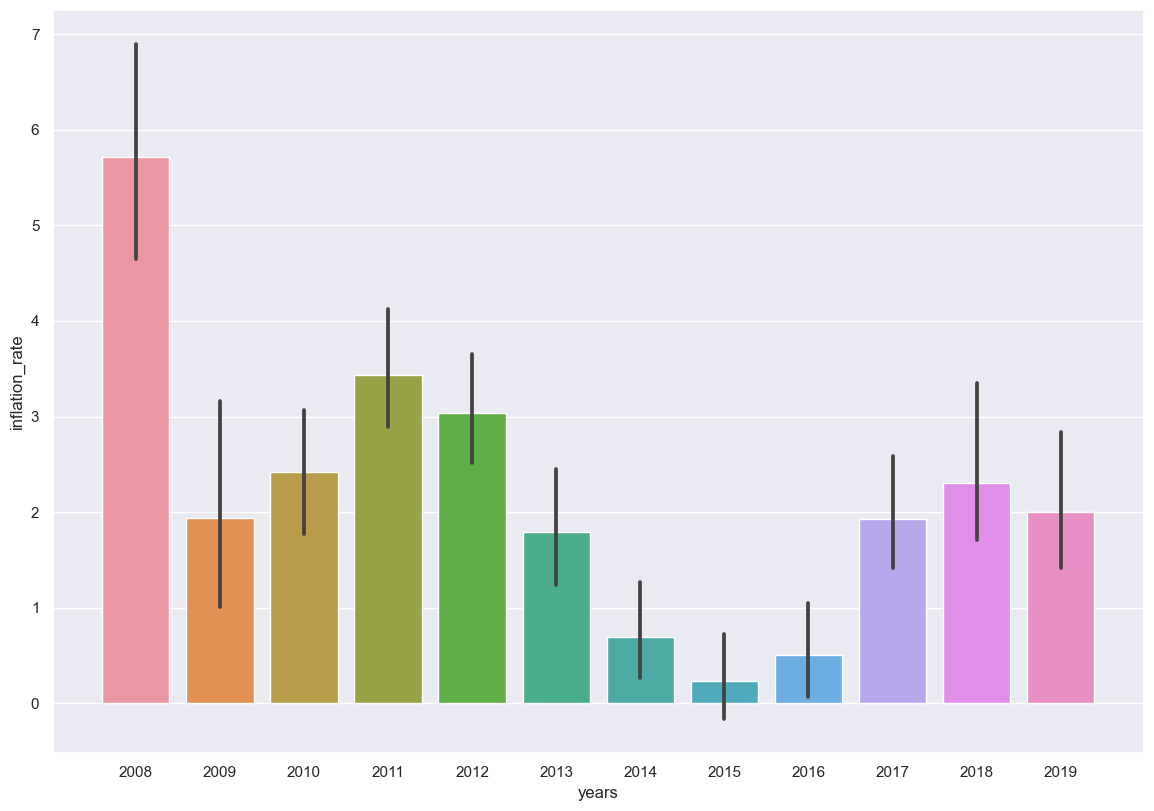

In [504]:
from seaborn import barplot

race_plot=barplot(data=inflationDataEU_Converted, x="years", y="inflation_rate")
race_plot.plot(title='Carbon Emission Race by Country (Since 1960 to 2018)', value_label='Value',item_label='Top 10 Countries')

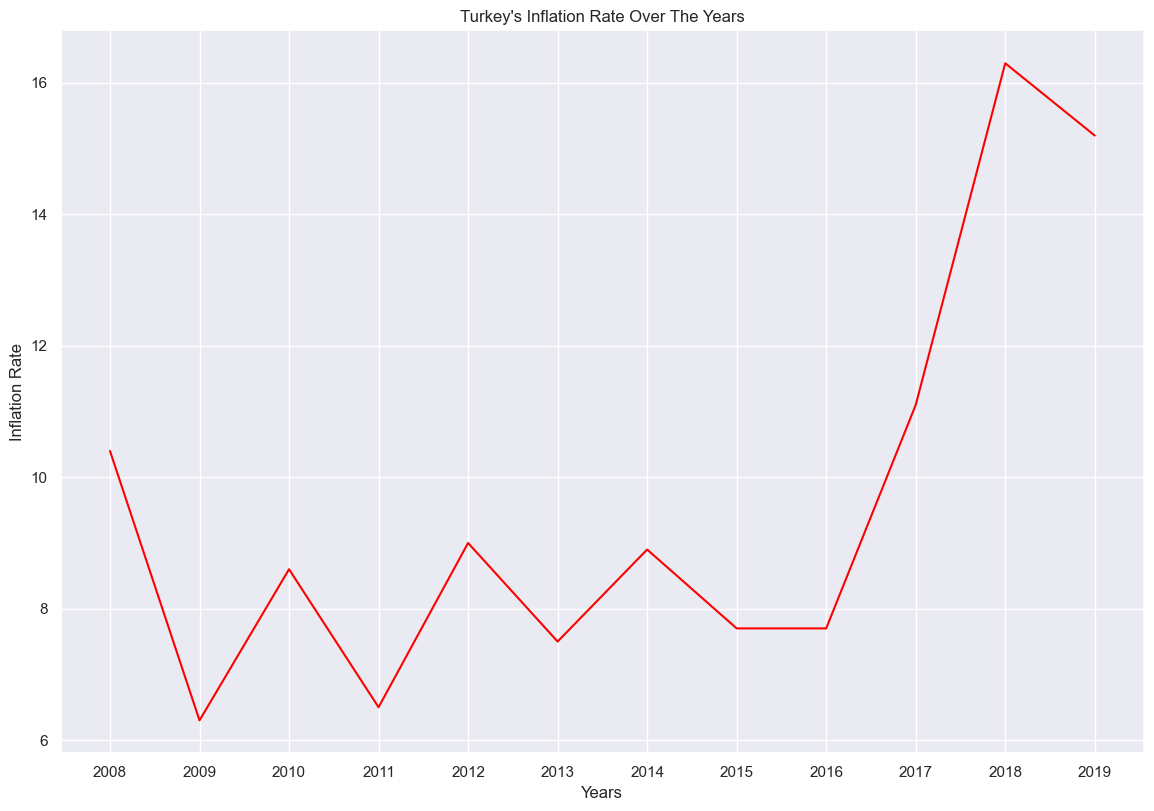

In [505]:
#Inflation Rates Of Selected Countries

# Creating filters to be used in extraction of data
filterTur = (inflationDataEU_Converted.geo == 'Turkey')
filterUS = (inflationDataEU_Converted.geo == 'United_States')
filterGer = (inflationDataEU_Converted.geo == 'Germany')
filterBul = (inflationDataEU_Converted.geo == 'Bulgaria')
filterRom = (inflationDataEU_Converted.geo == 'Romania')
filterHun = (inflationDataEU_Converted.geo == 'Hungary')
filterSlo= (inflationDataEU_Converted.geo == 'Slovakia')

# Extracting the data using the filters
turkeyData = inflationDataEU_Converted[filterTur].reset_index(drop = True)
usData = inflationDataEU_Converted[filterUS].reset_index(drop = True)
germanyData = inflationDataEU_Converted[filterGer].reset_index(drop = True)
bulgariaData = inflationDataEU_Converted[filterBul].reset_index(drop = True)
romaniaData = inflationDataEU_Converted[filterRom].reset_index(drop = True)
hungaryData = inflationDataEU_Converted[filterHun].reset_index(drop = True)
slovakiaData = inflationDataEU_Converted[filterSlo].reset_index(drop = True)


# Generating line charts for inflation rates
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True
turkeyData = inflationDataEU_Converted[filterTur].reset_index(drop = True)
x = turkeyData['years']
y = turkeyData['inflation_rate']
plot.plot(x, y, color='red')
plot.title("Turkey's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

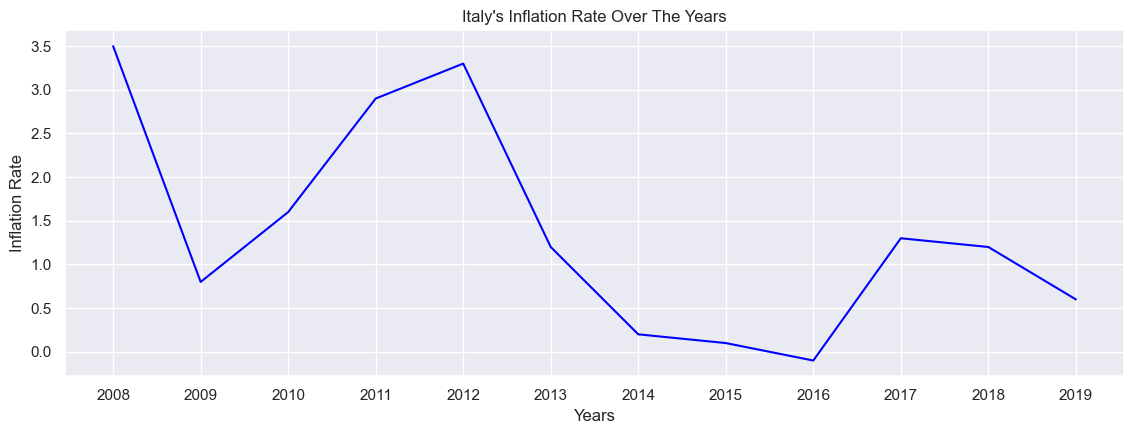

In [506]:
filterIta= (inflationDataEU_Converted.geo == 'Italy')
italyData = inflationDataEU_Converted[filterIta].reset_index(drop = True)

fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = italyData['years']
y = italyData['inflation_rate']
plot.plot(x, y, color='blue')
plot.title("Italy's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

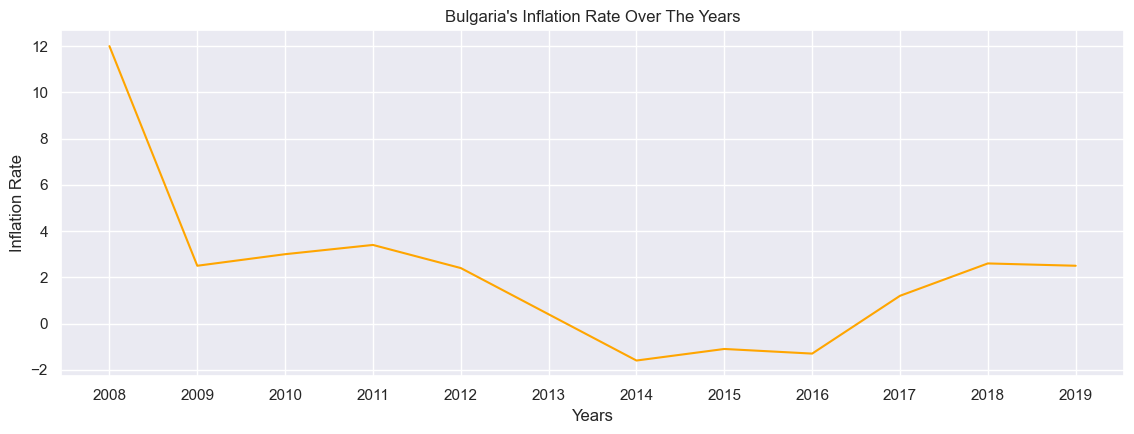

In [507]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = bulgariaData['years']
y = bulgariaData['inflation_rate']
plot.plot(x, y, color='orange')
plot.title("Bulgaria's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

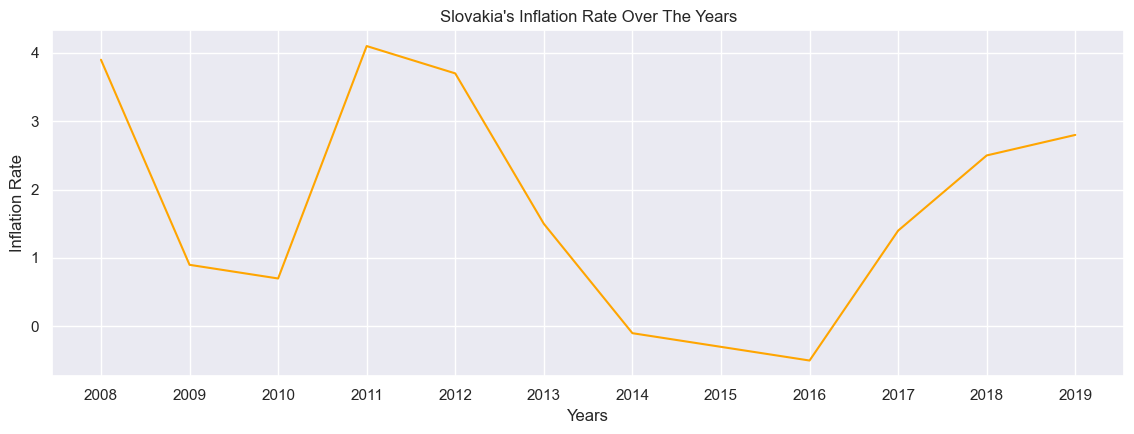

In [508]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = slovakiaData['years']
y = slovakiaData['inflation_rate']
plot.plot(x, y, color='orange')
plot.title("Slovakia's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

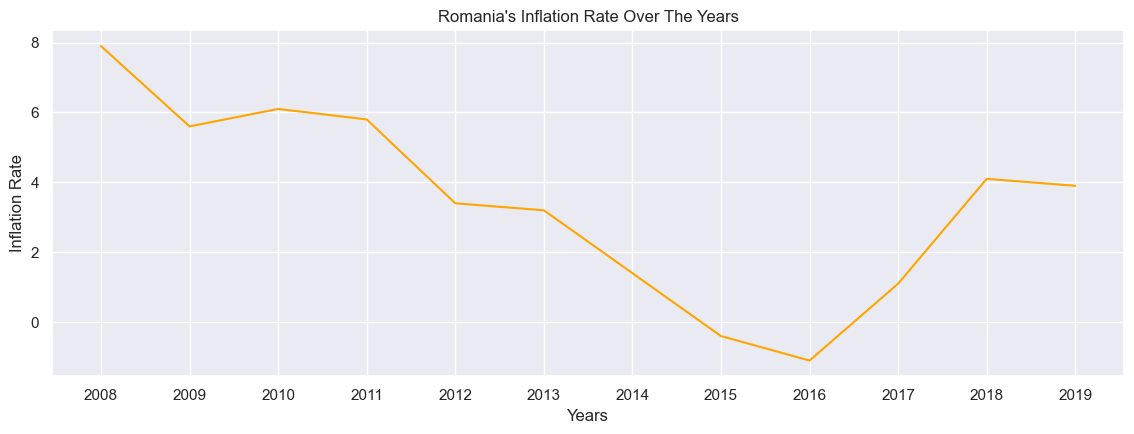

In [509]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = romaniaData['years']
y = romaniaData['inflation_rate']
plot.plot(x, y, color='orange')
plot.title("Romania's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

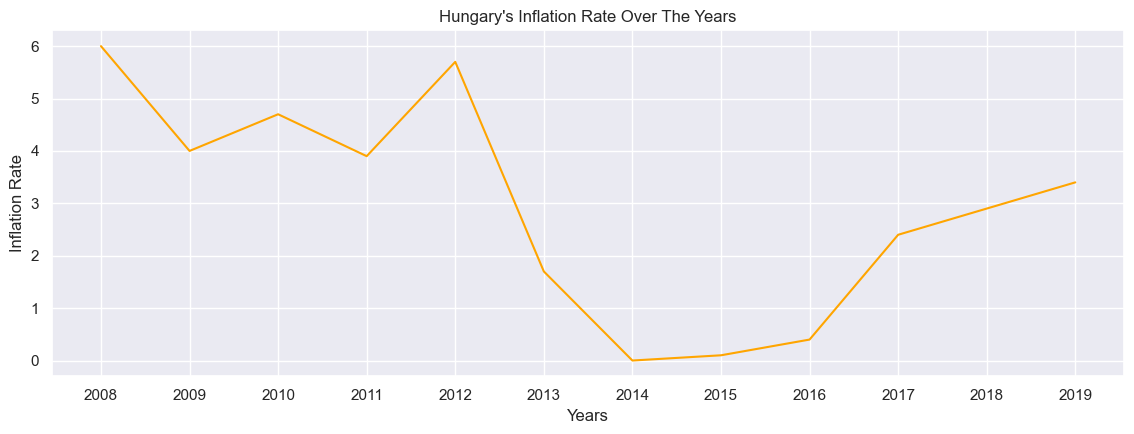

In [510]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = hungaryData['years']
y = hungaryData['inflation_rate']
plot.plot(x, y, color='orange')
plot.title("Hungary's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

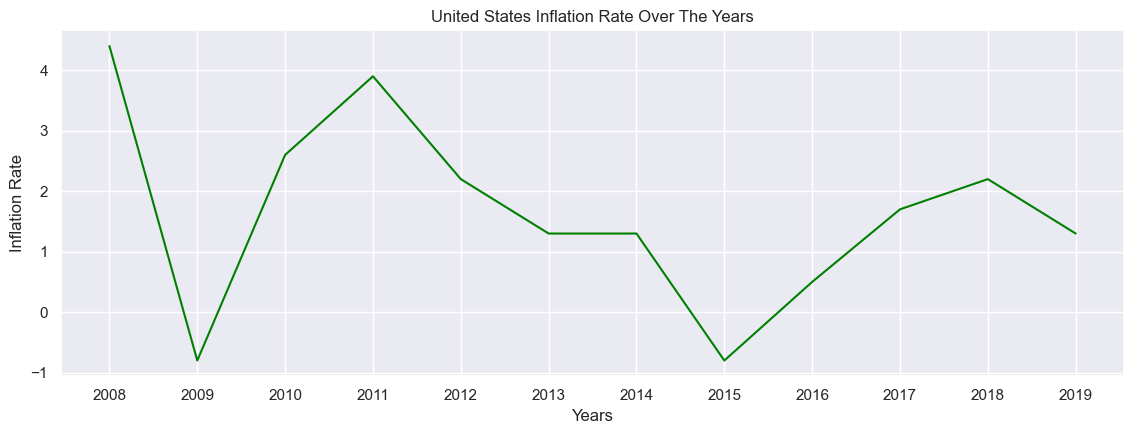

In [511]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True
x = usData['years']
y = usData['inflation_rate']
plot.plot(x, y, color='green')
plot.title("United States Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

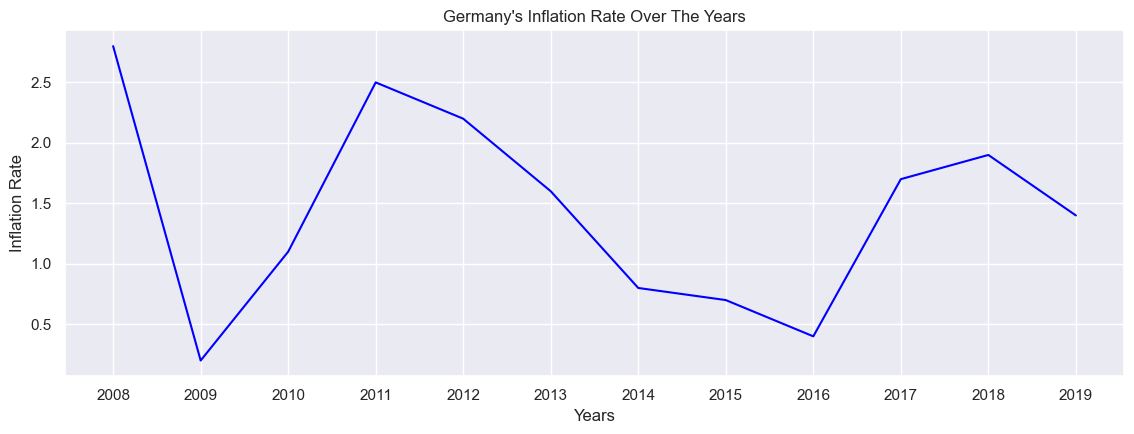

In [512]:
fig = plot.figure()
plot.rcParams["figure.figsize"] = [11.5, 4.5]
plot.rcParams["figure.autolayout"] = True

x = germanyData['years']
y = germanyData['inflation_rate']
plot.plot(x, y, color='blue')
plot.title("Germany's Inflation Rate Over The Years")
plot.xlabel("Years")
plot.ylabel("Inflation Rate")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plot.show()

In [513]:
# Creating an animated chrolpleth map

fig = px.choropleth(df_geo, locations="countryterritoryCode",
                    color="inflation_rate",
                    hover_name="geo",
                    animation_frame="years", # Animation frames
                    title = "Yearly Inflation Rates",
                    color_continuous_scale="Sunsetdark",
                    projection = 'equirectangular')

fig.update_geos(fitbounds="locations")
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})
fig.show()

In [523]:
# Configuring the area plot
fig = px.area(gdpChart,
              x="Population",
              y="GDP ($ per capita)",
              color="Region",
              facet_col="Region",  
              facet_col_wrap=5,
              height=550)
fig.update_layout(title="GDP per capita and Population relation - Regions", #BURAYI DEĞİŞTİR
                  title_x=0.50)
fig.update_layout(showlegend = False, yaxis_title = "GDP ($ per capita)")
fig.show()


In [524]:
# Tree map that shows gdps of countries (all)
fig = px.treemap(gdpChart,path = ['Country'],values = 'GDP ($ per capita)')

# title_x is used for the place of the title (0.5 center)
fig.update_layout(title='GDP Tree Map of All Countries',title_x=0.5)
fig.show()


In [525]:
# Reading the data
gdpData = pd.read_csv('GPD/GDP.csv')

gdpData

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,NaN
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,NaN
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,NaN
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,NaN


In [526]:
# Configuring the plot

fig = px.choropleth(gdpData, locations="Country Code",
                    color='2018',
                    hover_name="Country ",
                    #animation_frame="years",
                    title = "Yearly GDP data",
                    color_continuous_scale= [(0.00, "orange"),(0.15, "orange"),
                                             (0.15, "yellow"), (0.30, "yellow"),
                                             (0.30, "green"), (0.50, "green"), 
                                             (0.50, "blue"),  (0.75, "blue"),
                                             (0.75, "cyan"), (1, "cyan"),
                                            ],
                    projection = 'equirectangular')

fig.update_geos(fitbounds="locations")
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})
fig.show()

In [527]:

import plotly.offline as py

# Configuring the data
dataGDP = [ dict(
        type = 'choropleth',
        locations = gdpData['Country Code'],
        z = gdpData['2018'],
        locationmode = 'country codes',
        text = gdpData['Country '],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# GDP ($Per Capita)')
            )
       ]

# Configuring the layout of the map
layoutWorld = dict(
    title = 'GDP\'s of The Countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic', # Orthographic makes the world 3d
            rotation = dict(
                    lon = 38,
                    lat = 27),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(90, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=dataGDP, layout=layoutWorld)
py.iplot(fig, validate=False, filename='World_MapGDP(PC)')

In [528]:
# Filling nan values with 0
gdpData = gdpData.fillna(0)
gdpData.head(10)

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,0.000000,0.0
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,0.0
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,0.0
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,0.0
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,0.0
5,United Arab Emirates,ARE,72906.520120,71753.729560,71567.827520,70082.389330,72471.687290,74994.380620,76848.792240,80390.064110,...,54230.173670,56574.288180,58961.202010,62641.836990,66443.997580,70212.093010,72386.090470,73137.870190,75075.257410,0.0
6,Argentina,ARG,7380.115031,8210.643432,8942.569853,9777.214005,10435.910770,10225.118710,10857.429670,11802.842590,...,18524.856760,19817.450480,19764.225010,20365.613350,20008.320640,20551.833190,20130.408030,20843.155070,20610.568550,0.0
7,Armenia,ARM,2428.558960,2237.752728,1356.210786,1296.178498,1429.102386,1591.894846,1742.734114,1852.200102,...,6565.678660,7019.767748,7649.061531,8003.087763,8405.073655,8727.385447,8808.572714,9620.818491,10343.175590,0.0
8,Antigua and Barbuda,ATG,11326.702620,11806.234410,12005.986790,12682.475350,13524.670290,12924.355370,13729.757550,14416.114870,...,20134.817250,19876.215320,20672.912060,20656.381580,21599.199140,22422.029390,23670.302260,24644.551880,26868.133520,0.0
9,Australia,AUS,17329.706610,17790.980140,18189.378740,19131.841870,20064.459010,20894.397210,21972.052650,22934.786010,...,39324.368950,41965.358420,42826.789580,45902.047950,46880.220660,46276.150690,47305.880020,49628.811810,51663.365090,0.0


In [529]:
gdpData = gdpData.sort_values(by = '2018', ascending=False)
gdpData = gdpData[gdpData['2018'] != 0]
gdpData.head(10)


,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
194,Qatar,QAT,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,117518.70090,124024.56820,122674.72370,122495.78800,123308.20230,123822.08330,123573.63080,124609.30410,126898.42590,0.0
140,"Macao SAR, China",MAC,26204.03320,27301.74427,30879.10987,32541.81461,33953.07893,35091.22719,34872.92685,34671.84294,...,95951.96228,116456.95670,126618.37270,139962.17490,137832.96150,107069.59560,105577.66620,116370.74030,123892.16640,0.0
138,Luxembourg,LUX,29664.79513,32875.59926,33784.86985,35557.60211,37194.51922,39635.72375,41343.73163,42846.10545,...,85613.58661,92005.01684,91622.17742,95590.53870,101297.57570,103750.77510,108165.76140,110589.19240,113337.42050,0.0
202,Singapore,SGP,22655.11867,24286.78147,25705.58507,28598.32339,31448.46549,33390.07703,35086.41501,37384.43701,...,71565.99973,76034.33406,78978.82285,82881.40700,86611.51359,89007.46080,91452.04273,96552.60261,101531.63020,0.0
105,Ireland,IRL,13738.26598,14393.94598,15110.71462,15806.03556,17005.58515,18937.55551,20479.16734,22625.57673,...,43295.01791,44855.32470,46256.56888,47897.29166,51067.97671,69056.04604,70522.22592,77596.35505,83203.39468,0.0
27,Brunei Darussalam,BRN,54959.66686,56957.04564,59315.49556,59221.62765,60713.37770,63092.95787,64468.37649,63095.77642,...,78907.87122,82502.93530,83725.42103,82263.49831,80782.03150,80177.75612,78134.66652,79789.48786,80920.04868,0.0
5,United Arab Emirates,ARE,72906.52012,71753.72956,71567.82752,70082.38933,72471.68729,74994.38062,76848.79224,80390.06411,...,54230.17367,56574.28818,58961.20201,62641.83699,66443.99758,70212.09301,72386.09047,73137.87019,75075.25741,0.0
121,Kuwait,KWT,0.00000,0.00000,0.00000,0.00000,0.00000,59810.88601,60485.30540,59975.52572,...,73817.97698,78021.67168,80209.81453,78399.24717,76703.31167,75042.14197,75689.27575,71695.56421,72897.56235,0.0
33,Switzerland,CHE,27594.63205,27915.47156,28226.22674,28596.95284,29343.63158,29902.51870,30542.05743,31812.49876,...,53067.72464,56183.82162,57849.57204,60108.52002,61902.12954,63938.98939,64323.92524,66395.85634,68060.94105,0.0
171,Norway,NOR,18432.49795,19550.27114,20591.34107,21550.32066,22991.94589,24322.90897,26791.39258,28605.66293,...,57915.01937,62076.74066,65354.77925,66961.25310,65892.68928,60385.11676,57744.27451,62012.40776,65510.58527,0.0


Text(0.5, 1.0, 'Last 10 GDP ($ per capita) Countries')

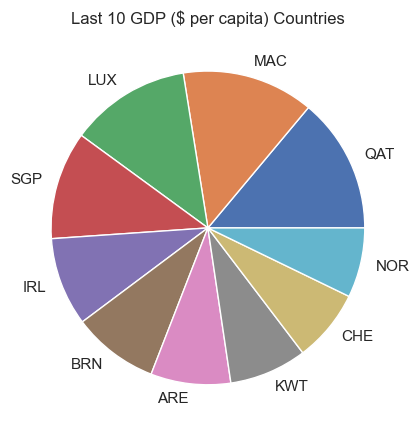

In [530]:
first10gdp = gdpData.head(10)

figure, axisPie = plot.subplots()
# Configuring plot
axisPie.pie(first10gdp['2018'], labels=first10gdp['Country Code'])
plot.ylabel("", horizontalalignment='left')
plot.title("First (Head) 10 GDP ($ per capita) Countries")

Text(0.5, 1.0, 'Last 10 GDP ($ per capita) Countries')

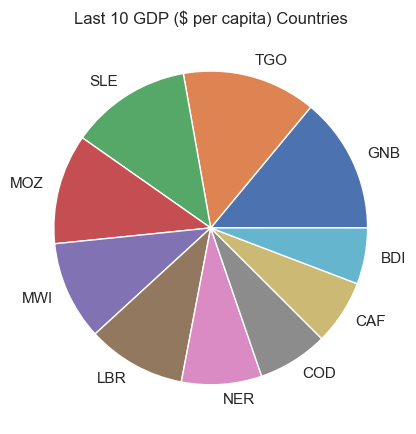

In [531]:
last10gdp = gdpData.tail(10)

figure, axisPie = plot.subplots()
# Configuring plot
axisPie.pie(last10gdp['2018'], labels=last10gdp['Country Code'])
plot.ylabel("", horizontalalignment='left')
plot.title("Last (Tail) 10 GDP ($ per capita) Countries")